In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [2]:
def load_train_imgs(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(path + i)
        for j in l2:
            img = Image.open(path+ i +'/'+j).convert('RGB')
            img = img.resize(size = (32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return labels,np.array(imgs)

In [3]:
y_train, x_train = load_train_imgs("F:/BE_Practicals_sem_VII/archive/chest_xray/train/")

In [4]:
x_train]

array([[[[ 32,  32,  32],
         [ 58,  58,  58],
         [ 86,  86,  86],
         ...,
         [ 46,  46,  46],
         [ 33,  33,  33],
         [ 15,  15,  15]],

        [[ 37,  37,  37],
         [ 58,  58,  58],
         [102, 102, 102],
         ...,
         [ 48,  48,  48],
         [ 35,  35,  35],
         [ 18,  18,  18]],

        [[ 39,  39,  39],
         [ 59,  59,  59],
         [ 91,  91,  91],
         ...,
         [ 49,  49,  49],
         [ 36,  36,  36],
         [ 20,  20,  20]],

        ...,

        [[  5,   5,   5],
         [ 23,  23,  23],
         [ 82,  82,  82],
         ...,
         [  5,   5,   5],
         [ 14,  14,  14],
         [ 17,  17,  17]],

        [[  4,   4,   4],
         [ 24,  24,  24],
         [ 84,  84,  84],
         ...,
         [  5,   5,   5],
         [ 13,  13,  13],
         [ 16,  16,  16]],

        [[  4,   4,   4],
         [ 25,  25,  25],
         [ 84,  84,  84],
         ...,
         [  6,   6,   6],
        

In [5]:
y_train

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [6]:
model = Sequential()
model.add(Conv2D(64,input_shape = (x_train.shape[1:]), kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation = 'softmax'))

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [9]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
Y_train = encode.fit_transform(y_train)

In [10]:
Y_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [88]:
H=model.fit(x_train,Y_train,epochs=20,batch_size=20)

Epoch 1/20
261/261 [==============================] - 7s 25ms/step - loss: 0.0717 - accuracy: 0.9735
Epoch 2/20
261/261 [==============================] - 6s 24ms/step - loss: 0.0677 - accuracy: 0.9755
Epoch 3/20
261/261 [==============================] - 6s 24ms/step - loss: 0.0762 - accuracy: 0.9751
Epoch 4/20
261/261 [==============================] - 6s 24ms/step - loss: 0.0772 - accuracy: 0.9714
Epoch 5/20
261/261 [==============================] - 7s 26ms/step - loss: 0.0711 - accuracy: 0.9730
Epoch 6/20
261/261 [==============================] - 7s 25ms/step - loss: 0.0632 - accuracy: 0.9766
Epoch 7/20
261/261 [==============================] - 7s 25ms/step - loss: 0.0763 - accuracy: 0.9730
Epoch 8/20
261/261 [==============================] - 6s 24ms/step - loss: 0.0689 - accuracy: 0.9747
Epoch 9/20
261/261 [==============================] - 7s 26ms/step - loss: 0.0748 - accuracy: 0.9718
Epoch 10/20
261/261 [==============================] - 7s 26ms/step - loss: 0.0716 - accura

In [89]:
def load_test_imgs(path):
    classes = ['PNEUMONIA','NORMAL']
    imgs = []
    labels = []
    for i in classes:
        l2 = os.listdir(path + i)
        for j in l2:
            img = Image.open(path+ i +'/'+j).convert('RGB')
            img = img.resize(size = (32,32))
            imgs.append(np.array(img))
            labels.append(i)
            del img
    return labels,np.array(imgs)

In [90]:
y_test, x_test = load_test_imgs("F:/BE_Practicals_sem_VII/archive/chest_xray/test/")

In [91]:
x_test

array([[[[ 26,  26,  26],
         [ 47,  47,  47],
         [ 83,  83,  83],
         ...,
         [ 92,  92,  92],
         [103, 103, 103],
         [ 93,  93,  93]],

        [[ 23,  23,  23],
         [ 46,  46,  46],
         [ 57,  57,  57],
         ...,
         [ 97,  97,  97],
         [105, 105, 105],
         [ 86,  86,  86]],

        [[ 17,  17,  17],
         [ 45,  45,  45],
         [ 50,  50,  50],
         ...,
         [ 94,  94,  94],
         [ 96,  96,  96],
         [ 68,  68,  68]],

        ...,

        [[  0,   0,   0],
         [  6,   6,   6],
         [ 72,  72,  72],
         ...,
         [ 62,  62,  62],
         [  1,   1,   1],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  8,   8,   8],
         [ 66,  66,  66],
         ...,
         [ 61,  61,  61],
         [  4,   4,   4],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  9,   9,   9],
         [ 62,  62,  62],
         ...,
         [ 66,  66,  66],
        

In [92]:
y_test

['PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEUMONIA',
 'PNEU

In [93]:
y_test[0]

'PNEUMONIA'

In [94]:
predicted_value = model.predict(x_test)

20/20 [==============================] - 0s 12ms/step


[0.29546216 0.70453787]
1
PNEUMONIA
262
Pnuemonia detected


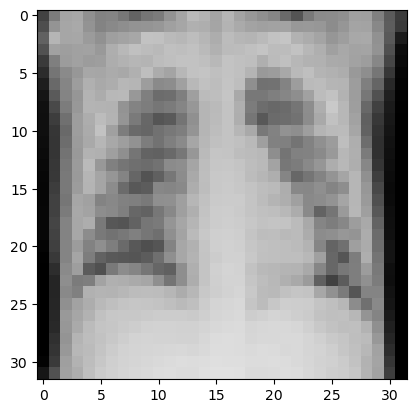

In [95]:
import random

classes = ['NORMAL', 'PNEUMONIA']
n=random.randint(0,680)
# predicted_index = np.argmax(predicted_values[n])
plt.imshow(x_test[n])
# predicted_class = classes[predicted_index]

print(predicted_value[n])
output = np.argmax(predicted_value[n])
print(output)
print(classes[output])
print(n)

if predicted_value[n][1] == 1:
    print("Pnuemonia detected")
elif predicted_value[n][0] > predicted_value[n][1] :
    print("No pnuemonia Detected")
else:
    print("Pnuemonia detected")

In [96]:
print(y_test[n])

PNEUMONIA


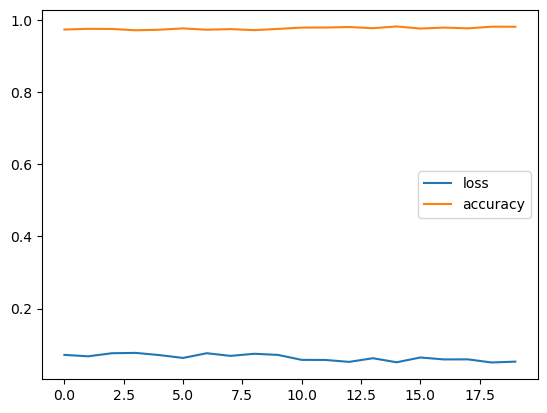

In [97]:
plt.plot(H.history['loss'],label='loss')
plt.plot(H.history['accuracy'],label='accuracy')
plt.legend()